# Using Python to Calculate Basic Hydrogeological Formulas

## Theis Equation:

In [3]:
import numpy as np
from scipy.special import exp1

def theis_drawdown(Q, T, r, t):
    u = r ** 2 * S / (4 *T* t)
    return Q / (4 * np.pi * T) * exp1(u)

# Example Usage
Q = 1000  # Pumping rate in m^3/day
T = 500  # Transmissivity in m^2/day
r = 50   # Distance from well in meters
t = 365   # Time since pumping began in days
S=0.000005
drawdown = theis_drawdown(Q, T, r, t)
print("Drawdown:", drawdown, "m")


Drawdown: 2.7542735020477056 m


### Jacob Straight-Line Method:

In [2]:
def jacob_method(Q, T, t):
    return Q / (4 * np.pi * T) * np.log10(t)

# Example Usage
T_est = 500  # Estimated transmissivity in m^2/day
Q = 1000      # Pumping rate in m^3/day
t = 365      # Time since pumping began in days

drawdown = jacob_method(Q, T_est, t)
print("Drawdown:", drawdown, "m")


Drawdown: 0.02350911492347369 m


### Hantush Equation:

In [4]:
def hantush_drawdown(Q, T, S, rw, b, r, t):
    u = r ** 2 * T / (4 * t)
    return (Q / (4 * np.pi * T) * exp1(u)) - (S / (2 * np.pi) * np.log((rw ** 2) / (4 * b ** 2) + 0.5))

# Example Usage
S = 0.001   # Storativity
rw = 0.2    # Well radius in meters
b = 20      # Aquifer thickness in meters

drawdown = hantush_drawdown(Q, T, S, rw, b, r, t)
print("Drawdown:", drawdown, "m")


Drawdown: 0.00011030984252810824 m


### Cooper-Jacob Equation:

In [3]:
def cooper_jacob_drawdown(Q, T, Ss, r, t):
    u = r ** 2 * T / (4 * t)
    return (Q / (4 * np.pi * T) * exp1(u)) + (Ss / (4 * np.pi) * np.log(t))

# Example Usage
Ss = 1e-5  # Specific storage
drawdown = cooper_jacob_drawdown(Q, T, Ss, r, t)
print("Drawdown:", drawdown, "m")

Drawdown: 2.706586878613719e-06 m


### Neuman Equation:

In [4]:
from scipy.special import exp1

def neuman_equation(Q, T, r, t):
    u = r**2 / (4 * T * t)
    w_u = exp1(u)
    return (Q / (4 * np.pi * T)) * (w_u - np.log(u) + 0.5772156649)

# Sample parameters
Q = 100   # Pumping rate (L³/T)
T = 1000  # Transmissivity (L²/T)
r = 10    # Radial distance from the well (L)
t = 10    # Time (T)

# Calculate drawdown
s_neuman = neuman_equation(Q, T, r, t)
print("Drawdown (Neuman Equation):", s_neuman)


Drawdown (Neuman Equation): 0.09537700184400684


### Chow Equation

In [5]:
def chow_method(Q, s, r):
    """
    Estimate transmissivity (T) using Chow's method.
    
    Parameters:
        Q (float): Pumping rate (cubic meters per second or cubic feet per second).
        s (float): Drawdown (meters or feet).
        r (float): Radial distance from the well (meters or feet).
        
    Returns:
        T (float): Transmissivity of the aquifer (square meters per second or square feet per second).
    """
    T = (Q / (4 * 3.1416)) * (1 / s)
    return T

def estimate_storativity(Q, ds_dt, T):
    """
    Estimate storativity (S) using Theis equation.
    
    Parameters:
        Q (float): Pumping rate (cubic meters per second or cubic feet per second).
        ds_dt (float): Rate of drawdown change (meters per second or feet per second).
        T (float): Transmissivity of the aquifer (square meters per second or square feet per second).
        
    Returns:
        S (float): Storativity of the aquifer (dimensionless).
    """
    S = (Q / (4 * 3.1416 * T)) * ds_dt
    return S

# Sample data
Q = 0.01  # Pumping rate (cubic meters per second)
s = 5.0   # Drawdown (meters)
r = 100   # Radial distance from the well (meters)
ds_dt = 0.001  # Rate of drawdown change (meters per second)

# Estimate transmissivity using Chow's method
T = chow_method(Q, s, r)
print("Estimated Transmissivity (T):", T)

# Estimate storativity using Theis equation
S = estimate_storativity(Q, ds_dt, T)
print("Estimated Storativity (S):", S)


Estimated Transmissivity (T): 0.0001591545709192768
Estimated Storativity (S): 0.005


In [1]:
#Boulton

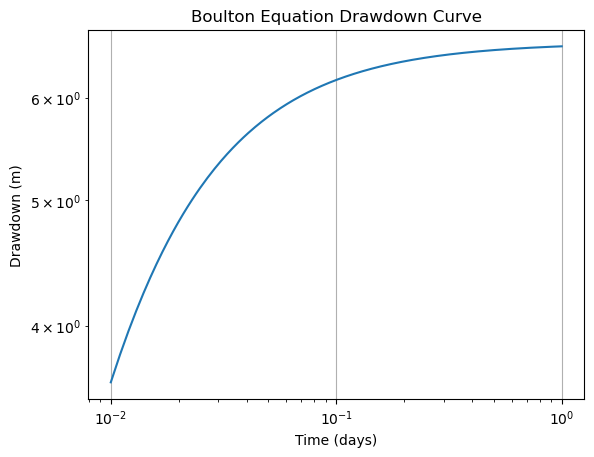

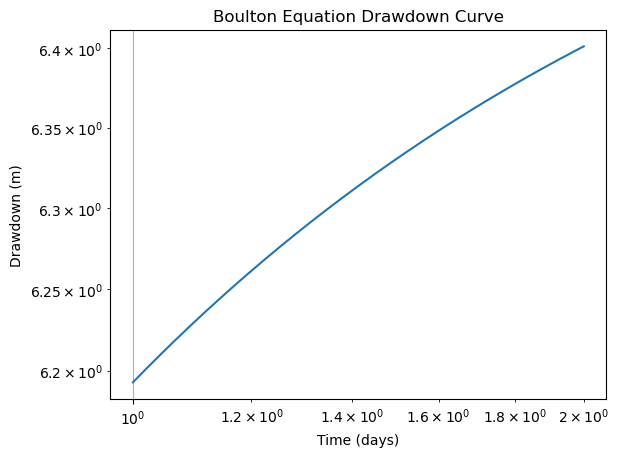

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
def compute_well_function(Ua, Ub, B):
    def integrand(u, B):
        return np.exp(-(B) * u) / u
    W, _ = quad(integrand, Ua, Ub, args=(B,))
    return W

def Boulton_equation(Q, T, r, S, Sy, t, D, Kh, Kv):
    
    Ua =  ((r**2) * S)/(4 * T * t) 
    Ub =   ((r**2) * Sy)/ (4 * T * t)
    B = ((r**2) * Kv) / ((D**2) * Kh)
    W = compute_well_function(Ua, Ub, B)
    
    # Compute drawdown using Boulton equation
    s = (Q / (4 * np.pi * T)) * W
    return s

# Example usage:
Q = 2000    # Pumping rate (m^3/day)
T =50   # Transmissivity (m^2/day)
r = 100        # Distance from pumping well (m)
S = 0.0025   # Storativity
Sy = 0.02     # Specific yield
D = 25      # Aquifer thickness (m)
Kh = 1     # Horizontal hydraulic conductivity (m/day)
Kv = 0.001     # Vertical hydraulic conductivity (m/day)
t_values = np.linspace(0.01, 1, 1000)  # Time since pumping began (days)

drawdown_values = [Boulton_equation(Q, T, r, S, Sy, t, D, Kh, Kv) for t in t_values]
# Plot drawdown vs. time
plt.plot(t_values, drawdown_values)
plt.xlabel('Time (days)')
plt.ylabel('Drawdown (m)')
plt.title('Boulton Equation Drawdown Curve')
plt.grid(True)
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.show()


import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
def compute_well_function(Ua, Ub, B):
    def integrand(u, B):
        return np.exp(-(B) * u) / u
    W, _ = quad(integrand, Ua, Ub, args=(B,))
    return W

def Boulton_equation(Q, T, r, S, Sy, t, D, Kh, Kv):
    
    Ua =  ((r**2) * S)/(4 * T * t) 
    Ub =   ((r**2) * Sy)/ (4 * T * t)
    B = ((r**2) * Kv) / ((D**2) * Kh)
    W = compute_well_function(Ua, Ub, B)
    
    # Compute drawdown using Boulton equation
    s = (Q / (4 * np.pi * T)) * W
    return s

# Example usage:
Q = 2000    # Pumping rate (m^3/day)
T =50   # Transmissivity (m^2/day)
r = 100        # Distance from pumping well (m)
S = 0.25   # Storativity
Sy = 2     # Specific yield
D = 25      # Aquifer thickness (m)
Kh = 10    # Horizontal hydraulic conductivity (m/day)
Kv = 0.001    # Vertical hydraulic conductivity (m/day)
t_values = np.linspace(1, 2, 1000)  # Time since pumping began (days)

drawdown_values = [Boulton_equation(Q, T, r, S, Sy, t, D, Kh, Kv) for t in t_values]
# Plot drawdown vs. time
plt.plot(t_values, drawdown_values)
plt.xlabel('Time (days)')
plt.ylabel('Drawdown (m)')
plt.title('Boulton Equation Drawdown Curve')
plt.grid(True)
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.show()
